# Primeros pasos con keras

## Importamos las librerías

In [1]:
!pip install keras
!pip install tensorflow

In [2]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Fichero de configuración de Keras

In [3]:
!cat ~/.keras/keras.json

{
    "floatx": "float32",
    "epsilon": 1e-07,
    "backend": "tensorflow",
    "image_data_format": "channels_last"
}

## Comprobamos si estamos usando TensorFlow o Theano como backend

In [4]:
!python -c "from keras import backend; print (backend._BACKEND)"

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
tensorflow


### Podemos cambiar el backend a Theano, si queremos

In [5]:
#KERAS_BACKEND=theano python -c "from keras import backend; print(backend._BACKEND)"

# Construyendo modelos de aprendizaje profundo (Deep Learning) con Keras

Keras se enfoca en la idea de un "modelo".

El tipo principal de modelo se llama una Sequence, que es un apilamiento lineal de capas.

1. Definición: Se crea una secuencia (Sequence) y le agregan capas en el orden en que se desea realizar el cálculo.
2. Compilación: Una vez definido, se compila el modelo que hace uso del framework elegido (Theano o TensorFlow) para optimizar los cálculo que realiza el modelo. En este punto, se puede especificar la función de pérdida y el optimizador que se utilizará.
3. Ajuste: Una vez compilado, el modelo debe ajustarse a los datos (fit). Esto se puede hacer un lote de datos (batch) o entrenando el modelo sobre todos los datos. En este punto es donde sucede todo el cálculo.
3. Predecir: Una vez entrenado, se puede usar el modelo para hacer predicciones sobre nuevos datos.

# Creando nuestra primera red neuronal con Keras
 Adaptado del tutorial de Machine Learning Mastery (https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)

## Preparamos los imports necesarios

In [6]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

## 1. Cargamos los datos
### Pima Indians onset of diabetes dataset.
This is a standard machine learning dataset from the UCI Machine Learning repository. It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years.

The dataset has 9 columns and the range 0:8 will select columns from 0 to 7 (the X), where the last column (the Y) indicates whether they had diabetes.

In [7]:
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

## 2. Definimos el modelo

Models in Keras are defined as a sequence of layers.

We create a Sequential model and **add layers one at a time** until we are happy with our network topology.

The first thing to get right is to **ensure the input layer has the right number of inputs**. This can be specified when creating the first layer with the input_dim argument and setting it to 8 for the 8 input variables.

How do we know the number of layers and their types?

This is a very hard question. There are heuristics that we can use and often the best network structure is found through a process of trial and error experimentation. Generally, you need a network large enough to capture the structure of the problem if that helps at all.

In this example, we will use a fully-connected network structure with three layers.

**Fully connected layers are defined using the Dense class**. We can specify the number of neurons in the layer as the first argument, the initialization method as the second argument as init and specify the activation function using the activation argument.

In this case, we initialize the network weights to a small random number generated from a uniform distribution (‘uniform‘), in this case between 0 and 0.05 because that is the default uniform weight initialization in Keras. Another traditional alternative would be ‘normal’ for small random numbers generated from a Gaussian distribution.

We will use the rectifier (‘relu‘) activation function on the first two layers and the sigmoid function in the output layer. It used to be the case that sigmoid and tanh activation functions were preferred for all layers. These days, **better performance is achieved using the rectifier activation function ReLU**. We use a **sigmoid on the output layer to ensure our network output is between 0 and 1** and easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.

We can piece it all together by adding each layer. The first layer has 12 neurons and expects 8 input variables. The second hidden layer has 8 neurons and finally, the output layer has 1 neuron to predict the class (onset of diabetes or not).

In [8]:
# create model
model = Sequential()
# The first layer has 12 neurons and expects 8 input variables.
model.add(Dense(12, input_dim=8, activation='relu'))
# The second hidden layer has 8 neurons
model.add(Dense(8, activation='relu'))
# The output layer has 1 neuron to predict the class (onset of diabetes or not)
model.add(Dense(1, activation='sigmoid'))

## 3. Compile Model

Now that the model is defined, we can compile it.

Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to make predictions for this problem.

We must specify:
- **The loss function** to use to evaluate a set of weights. In this case, we will use **logarithmic loss, which for a binary classification problem is defined in Keras as “binary_crossentropy“**
- **The optimizer** used to search through different weights for the network and any optional. We will use the efficient gradient descent algorithm **“adam” for no other reason that it is an efficient default**.
- **The metrics** we would like to collect and report during training. Because it is a **classification problem**, we will collect and report **the classification accuracy as the metric**.

In [9]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## 4. Fit Model
We have defined our model and compiled it ready for efficient computation.

Now it is time to execute the model on some data.

We can train or fit our model on our loaded data by calling the **fit()** function on the model.

The training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the nepochs argument. We can also set the number of instances that are evaluated before a weight update in the network is performed, called the batch size and set using the batch_size argument.

For this problem, we will run for a **small number of iterations (150)** and use a relatively **small batch size of 10**. Again, these can be chosen experimentally by trial and error.

In [10]:
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
768/768 [==============================] - 0s 475us/step - loss: 3.7066 - acc: 0.5977
Epoch 2/150
768/768 [==============================] - 0s 113us/step - loss: 0.9366 - acc: 0.5911
Epoch 3/150
768/768 [==============================] - 0s 124us/step - loss: 0.7477 - acc: 0.6432
Epoch 4/150
768/768 [==============================] - 0s 130us/step - loss: 0.7119 - acc: 0.6549
Epoch 5/150
768/768 [==============================] - 0s 131us/step - loss: 0.6841 - acc: 0.6680
Epoch 6/150
768/768 [==============================] - 0s 114us/step - loss: 0.6518 - acc: 0.6784
Epoch 7/150
768/768 [==============================] - 0s 109us/step - loss: 0.6506 - acc: 0.6823
Epoch 8/150
768/768 [==============================] - 0s 110us/step - loss: 0.6383 - acc: 0.6849
Epoch 9/150
768/768 [==============================] - 0s 104us/step - loss: 0.6246 - acc: 0.6966
Epoch 10/150
768/768 [==============================] - 0s 112us/step - loss: 0.6319 - acc: 0.6771
Epoch 11/150
768/76

768/768 [==============================] - 0s 99us/step - loss: 0.4962 - acc: 0.7617
Epoch 85/150
768/768 [==============================] - 0s 106us/step - loss: 0.5056 - acc: 0.7552
Epoch 86/150
768/768 [==============================] - 0s 97us/step - loss: 0.5076 - acc: 0.7526
Epoch 87/150
768/768 [==============================] - 0s 96us/step - loss: 0.4975 - acc: 0.7617
Epoch 88/150
768/768 [==============================] - 0s 101us/step - loss: 0.4992 - acc: 0.7669
Epoch 89/150
768/768 [==============================] - 0s 97us/step - loss: 0.5033 - acc: 0.7734
Epoch 90/150
768/768 [==============================] - 0s 105us/step - loss: 0.5082 - acc: 0.7539
Epoch 91/150
768/768 [==============================] - 0s 114us/step - loss: 0.4978 - acc: 0.7617
Epoch 92/150
768/768 [==============================] - 0s 149us/step - loss: 0.5045 - acc: 0.7513
Epoch 93/150
768/768 [==============================] - 0s 126us/step - loss: 0.4975 - acc: 0.7617
Epoch 94/150
768/768 [=====

## 5. Evaluate Model
We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset.

This will only give us **an idea of how well we have modeled the dataset** (e.g. train accuracy), but no idea of how well the algorithm might perform on new data. We have done this for simplicity, but ideally, you could separate your data into train and test datasets for training and evaluation of your model.

You can evaluate your model on your training dataset using the **evaluate()** function on your model and pass it the same input and output used to train the model.

This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy.

In [11]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

768/768 [==============================] - 0s 56us/step

acc: 77.99%


## 6. Tie It All Together
You have just seen how you can easily create your first neural network model in Keras.

Let’s tie it all together into a complete code example.

Running this example, you should see **a message for each of the 150 epochs printing the loss and accuracy** for each, followed by the final evaluation of the trained model on the training dataset.

Keep in mind that **Neural networks are a stochastic algorithm**, meaning that the same algorithm on the same data can train a different model with different skill. This is a feature, not a bug. You can learn more about this in the post:

* Se denomina **estocástico** al sistema cuyo comportamiento es intrínsecamente **no determinista**. Está determinado tanto por las acciones predecibles del proceso como por elementos aleatorios.

In [12]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/150
768/768 [==============================] - 0s 400us/step - loss: 3.6856 - acc: 0.5964
Epoch 2/150
768/768 [==============================] - 0s 95us/step - loss: 0.9287 - acc: 0.6003
Epoch 3/150
768/768 [==============================] - 0s 99us/step - loss: 0.7406 - acc: 0.6380
Epoch 4/150
768/768 [==============================] - 0s 113us/step - loss: 0.7083 - acc: 0.6615
Epoch 5/150
768/768 [==============================] - 0s 101us/step - loss: 0.6810 - acc: 0.6810
Epoch 6/150
768/768 [==============================] - 0s 95us/step - loss: 0.6505 - acc: 0.6836
Epoch 7/150
768/768 [==============================] - 0s 110us/step - loss: 0.6482 - acc: 0.6732
Epoch 8/150
768/768 [==============================] - 0s 96us/step - loss: 0.6356 - acc: 0.6927
Epoch 9/150
768/768 [==============================] - 0s 98us/step - loss: 0.6231 - acc: 0.6914
Epoch 10/150
768/768 [==============================] - 0s 95us/step - loss: 0.6280 - acc: 0.6797
Epoch 11/150
768/768 [===

768/768 [==============================] - 0s 89us/step - loss: 0.4964 - acc: 0.7578
Epoch 85/150
768/768 [==============================] - 0s 90us/step - loss: 0.5054 - acc: 0.7526
Epoch 86/150
768/768 [==============================] - 0s 92us/step - loss: 0.5074 - acc: 0.7500
Epoch 87/150
768/768 [==============================] - 0s 110us/step - loss: 0.4979 - acc: 0.7539
Epoch 88/150
768/768 [==============================] - 0s 118us/step - loss: 0.5018 - acc: 0.7656
Epoch 89/150
768/768 [==============================] - 0s 100us/step - loss: 0.5048 - acc: 0.7760
Epoch 90/150
768/768 [==============================] - 0s 100us/step - loss: 0.5106 - acc: 0.7487
Epoch 91/150
768/768 [==============================] - 0s 99us/step - loss: 0.4972 - acc: 0.7604
Epoch 92/150
768/768 [==============================] - 0s 100us/step - loss: 0.5094 - acc: 0.7474
Epoch 93/150
768/768 [==============================] - 0s 96us/step - loss: 0.5018 - acc: 0.7643
Epoch 94/150
768/768 [======

Neural networks are a stochastic algorithm, meaning that the same algorithm on the same data can train a different model with different skill. This is a feature, not a bug. You can learn more about this in the post:

## 7. Make Predictions
Making predictions is as easy as calling **model.predict()**. We are using a **sigmoid activation function** on the output layer, so the predictions will be in **the range between 0 and 1**. We can easily convert them into a crisp binary prediction for this classification task by **rounding them**.

Running this modified example now prints the predictions for each input pattern. We could use these predictions directly in our application if needed.

In [13]:
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10,  verbose=2)
# calculate predictions
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/150
 - 0s - loss: 0.6772 - acc: 0.6510
Epoch 2/150
 - 0s - loss: 0.6585 - acc: 0.6510
Epoch 3/150
 - 0s - loss: 0.6472 - acc: 0.6510
Epoch 4/150
 - 0s - loss: 0.6393 - acc: 0.6510
Epoch 5/150
 - 0s - loss: 0.6320 - acc: 0.6510
Epoch 6/150
 - 0s - loss: 0.6179 - acc: 0.6510
Epoch 7/150
 - 0s - loss: 0.6190 - acc: 0.6510
Epoch 8/150
 - 0s - loss: 0.6129 - acc: 0.6510
Epoch 9/150
 - 0s - loss: 0.6091 - acc: 0.6510
Epoch 10/150
 - 0s - loss: 0.6176 - acc: 0.6510
Epoch 11/150
 - 0s - loss: 0.6056 - acc: 0.6510
Epoch 12/150
 - 0s - loss: 0.6028 - acc: 0.6510
Epoch 13/150
 - 0s - loss: 0.5997 - acc: 0.6510
Epoch 14/150
 - 0s - loss: 0.6035 - acc: 0.6510
Epoch 15/150
 - 0s - loss: 0.5988 - acc: 0.6510
Epoch 16/150
 - 0s - loss: 0.5988 - acc: 0.6510
Epoch 17/150
 - 0s - loss: 0.6001 - acc: 0.6510
Epoch 18/150
 - 0s - loss: 0.6005 - acc: 0.6510
Epoch 19/150
 - 0s - loss: 0.5967 - acc: 0.6510
Epoch 20/150
 - 0s - loss: 0.5985 - acc: 0.6510
Epoch 21/150
 - 0s - loss: 0.5968 - acc: 0.6510
E

# 8. Visualizaciones

## Resumen del modelo

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


## Visualización del modelo

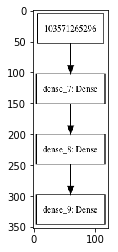

In [17]:
from keras.utils import plot_model
plot_model(model, to_file ="model.png")

from matplotlib import pyplot as plt
img = plt.imread('model.png')
plt.imshow(img)
plt.show()